In [1]:
# for data wrangling
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# for basemaps 
import contextily as ctx

# to for advanced plotting
import matplotlib.pyplot as plt

import plotly.express as px

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
countrace2019gdf = gpd.read_file('blockcountrace2019gdf.geojson')
pd.set_option('display.max_columns', None)
countrace2019gdf.sample(3)

geoid                        name   Total  White alone  \
32   15000US060014011004  Block Group 4, Alameda, CA  1336.0        771.0   
210  15000US060014071022  Block Group 2, Alameda, CA  1125.0        142.0   
137  15000US060014054011  Block Group 1, Alameda, CA  1562.0        450.0   

     Black or African American alone  American Indian and Alaska Native alone  \
32                             200.0                                      0.0   
210                            342.0                                      0.0   
137                            175.0                                      0.0   

     Asian alone  Native Hawaiian and Other Pacific Islander alone  \
32         129.0                                               0.0   
210        146.0                                               0.0   
137        463.0                                               0.0   

     Some other race alone  Two or more races  Hispanic or Latino  \
32                    50.0              102.0                84.0   
210                    0.0               41.0               454.0   
137                    0.0               86.0               388.0   

     Percent White alone  Percent Black or African American alone  \
32             57.709581                                14.970060   
210            12.622222                                30.400000   
137            28.809219                                11.203585   

     Percent American Indian and Alaska Native alone  Percent Asian alone  \
32                                               0.0             9.655689   
210                                              0.0            12.977778   
137                                              0.0            29.641485   

     Percent Native Hawaiian and Other Pacific Islander alone  \
32                                                 0.0          
210                                                0.0          
137                                                0.0          

     Percent Some other race alone  Percent Two or more races  \
32                        3.742515                   7.634731   
210                       0.000000                   3.644444   
137                       0.000000                   5.505762   

     Percent Hispanic or Latino       geoid10     newgeoid  counts  \
32                     6.287425  060014011004  60014011004      16   
210                   40.355556  060014071022  60014071022       6   
137                   24.839949  060014054011  60014054011      22   

                                              geometry  
32   MULTIPOLYGON (((-122.26764 37.82783, -122.2676...  
210  MULTIPOLYGON (((-122.21530 37.77784, -122.2152...  
137  MULTIPOLYGON (((-122.25102 37.79918, -122.2508...

In [3]:
columns_to_keep = ['Total',
 'Percent White alone',
 'Percent Black or African American alone',
 'Percent American Indian and Alaska Native alone',
 'Percent Asian alone',
 'Percent Native Hawaiian and Other Pacific Islander alone',
 'Percent Some other race alone',
 'Percent Two or more races',
 'Percent Hispanic or Latino',
 'newgeoid',
 'counts',
 'geometry']

In [4]:
newcountrace2019gdf = countrace2019gdf[columns_to_keep]
newcountrace2019gdf

Total  Percent White alone  Percent Black or African American alone  \
0    3120.0            74.262821                                 3.429487   
1     990.0            76.868687                                 1.313131   
2    1017.0            70.206490                                 3.834808   
3    1134.0            64.814815                                 0.000000   
4    1237.0            81.487470                                 1.455133   
..      ...                  ...                                      ...   
320  1290.0             1.705426                                31.627907   
321  1400.0             2.428571                                49.714286   
322  1787.0            12.870733                                22.439843   
323  2705.0            14.898336                                61.072089   
324   583.0            52.830189                                 9.090909   

     Percent American Indian and Alaska Native alone  Percent Asian alone  \
0                                           0.000000            12.532051   
1                                           0.404040             4.141414   
2                                           0.000000            12.782694   
3                                           0.000000            24.162257   
4                                           0.000000             9.135004   
..                                               ...                  ...   
320                                         0.697674             5.348837   
321                                         0.214286             6.928571   
322                                         0.000000            16.004477   
323                                         0.258780            10.868762   
324                                         1.543739            23.670669   

     Percent Native Hawaiian and Other Pacific Islander alone  \
0                                             0.000000          
1                                             0.000000          
2                                             0.000000          
3                                             0.000000          
4                                             0.000000          
..                                                 ...          
320                                           0.000000          
321                                           0.000000          
322                                           0.000000          
323                                           0.887246          
324                                           0.514580          

     Percent Some other race alone  Percent Two or more races  \
0                         0.000000                   5.993590   
1                         0.000000                   7.575758   
2                         0.000000                   5.506391   
3                         0.000000                   4.409171   
4                         0.000000                   0.000000   
..                             ...                        ...   
320                       0.000000                   2.015504   
321                       0.000000                   0.714286   
322                       0.000000                   2.797985   
323                       0.258780                   1.922366   
324                       0.857633                   3.430532   

     Percent Hispanic or Latino     newgeoid  counts  \
0                      3.782051  60014001001      75   
1                      9.696970  60014002001       1   
2                      7.669617  60014002002      12   
3                      6.613757  60014003001      30   
4                      7.922393  60014003002      15   
..                          ...          ...     ...   
320                   58.604651  60014104001       7   
321                   40.000000  60014104002       6   
322                   45.886961  60014104003       9   
323                    9.833641  6

In [5]:
newcountrace2019gdf['CountPer1000'] = (newcountrace2019gdf['counts']*1000)/newcountrace2019gdf['Total']

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


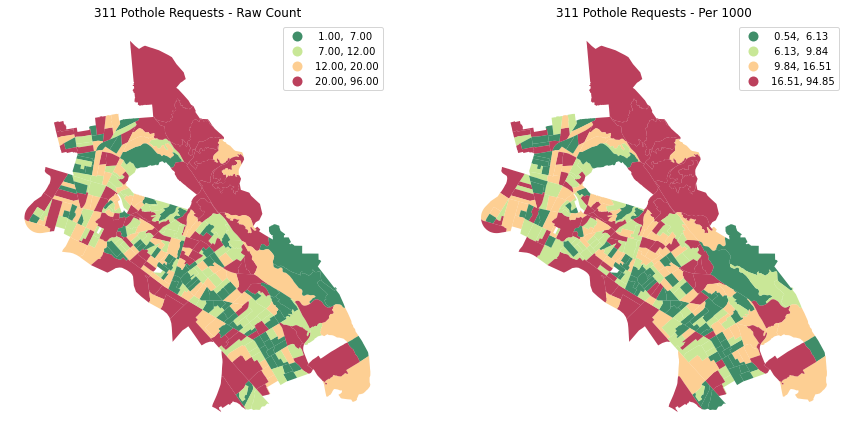

In [7]:
# Let's see how this map compares to just a map of 311 counts, without spatial weighting. 
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

# two subplots produces ax[0] (left) and ax[1] (right)

# regular count map on the left
newcountrace2019gdf.plot(ax=ax[0], # this assigns the map to the left subplot
         column='counts', 
         cmap='RdYlGn_r', 
         scheme='quantiles',
         k=4, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.75, 
        legend=True)


ax[0].axis("off")
ax[0].set_title("311 Pothole Requests - Raw Count")

# spatial lag map on the right
newcountrace2019gdf.plot(ax=ax[1], # this assigns the map to the right subplot
         column='CountPer1000', 
         cmap='RdYlGn_r', 
         scheme='quantiles',
         k=4, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.75,
         legend=True)

ax[1].axis("off")
ax[1].set_title("311 Pothole Requests - Per 1000")

plt.show()

In [8]:
mapcountrace2019gdf = newcountrace2019gdf.to_crs(epsg=3857)

In [9]:
countsort2019gdf = mapcountrace2019gdf.sort_values(by='counts',ascending = False)
countsort2019gdf.head(10)

Total  Percent White alone  Percent Black or African American alone  \
108  1780.0            83.314607                                 1.910112   
0    3120.0            74.262821                                 3.429487   
218  1123.0            20.926091                                10.774711   
164  1180.0             5.423729                                 3.305085   
103  2046.0            69.794721                                 0.733138   
112  1421.0            80.717804                                 4.996481   
161   863.0            38.818076                                 7.879490   
188  1110.0            17.207207                                14.774775   
101  2373.0            66.371681                                 4.888327   
279  2197.0             1.957214                                31.816113   

     Percent American Indian and Alaska Native alone  Percent Asian alone  \
108                                         0.000000            10.280899   
0                                           0.000000            12.532051   
218                                         0.267142             2.315227   
164                                         0.000000            10.254237   
103                                         0.879765             9.677419   
112                                         0.000000             6.896552   
161                                         0.000000            21.205098   
188                                         0.450450            35.855856   
101                                         0.000000            13.569322   
279                                         0.000000             2.958580   

     Percent Native Hawaiian and Other Pacific Islander alone  \
108                                           0.000000          
0                                             0.000000          
218                                           1.068566          
164                                           0.000000          
103                                           0.000000          
112                                           0.000000          
161                                           0.347625          
188                                           0.450450          
101                                           0.000000          
279                                           0.273100          

     Percent Some other race alone  Percent Two or more races  \
108                       0.000000                   0.898876   
0                         0.000000                   5.993590   
218                       0.000000                   4.541407   
164                       0.000000                   0.000000   
103                       0.000000                  14.125122   
112                       0.985222                   1.055595   
161                       0.000000                   2.896871   
188                       0.000000                   4.414414   
101                       0.000000                   7.627476   
279                       0.000000                   1.593081   

     Percent Hispanic or Latino     newgeoid  counts  \
108                    3.595506  60014045024      96   
0                      3.782051  60014001001      75   
218                   60.106857  60014073002      71   
164                   81.016949  60014061001      63   
103                    4.789834  60014044003      62   
112                    5.348346  60014046004      61   
161                   28.852839  60014060001      61   
188                   26.846847  60014066021      54   
101                    7.543194  60014044001      54   
279                   61.401912  60014090003      53   

                                              geometry  CountPer1000  
108  MULTIPOLYGON (((-13604998.508 4555615.858, -13...     53.932584  
0    MULTIPOLYGON (((-13608464.885 4563254.661, -13...     24.038462  
218  MULTIPOLYGON (((-13606014.076 4546219.642, 

In [35]:
countsort2019gdf.describe()

Total  Percent White alone  \
count   325.000000           325.000000   
mean   1291.080000            29.818418   
std     495.570833            23.782983   
min     369.000000             0.000000   
25%     946.000000             7.803121   
50%    1189.000000            26.501241   
75%    1547.000000            47.677596   
max    3423.000000            85.530547   

       Percent Black or African American alone  \
count                               325.000000   
mean                                 22.844132   
std                                  16.692313   
min                                   0.000000   
25%                                   9.807163   
50%                                  19.294118   
75%                                  32.704187   
max                                  80.804598   

       Percent American Indian and Alaska Native alone  Percent Asian alone  \
count                                       325.000000           325.000000   
mean                                          0.344002            15.386803   
std                                           0.870835            14.284894   
min                                           0.000000             0.000000   
25%                                           0.000000             5.516432   
50%                                           0.000000            11.691884   
75%                                           0.285578            20.092227   
max                                           6.985646            81.752701   

       Percent Native Hawaiian and Other Pacific Islander alone  \
count                                         325.000000          
mean                                            0.501399          
std                                             1.382958          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             0.165426          
max                                            10.710059          

       Percent Some other race alone  Percent Two or more races  \
count                     325.000000                 325.000000   
mean                        0.415780                   4.864203   
std                         1.124764                   4.229910   
min                         0.000000                   0.000000   
25%                         0.000000                   1.850424   
50%                         0.000000                   4.247991   
75%                         0.000000                   6.925996   
max                        12.710280                  30.012005   

       Percent Hispanic or Latino      counts  CountPer1000  
count                  325.000000  325.000000    325.000000  
mean                    25.825264   15.963077     13.673279  
std                     21.566027   13.238034     12.667676  
min                      1.057828    1.000000      0.537634  
25%                      9.186352    7.000000      6.128703  
50%                     17.797018   12.000000      9.840098  
75%                     39.698965   20.000000     16.506190  
max                     88.247214   96.000000     94.850949

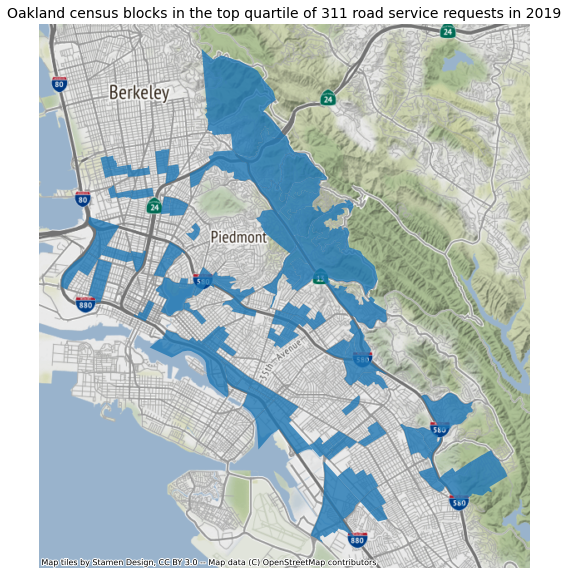

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

countsort2019gdf[countsort2019gdf['counts'] > 20].plot(ax=ax, alpha=0.8)


ax.axis('off')


ax.set_title('Oakland census blocks in the top quartile of 311 road service requests in 2019',fontsize=14)

# add a basemap
ctx.add_basemap(ax)

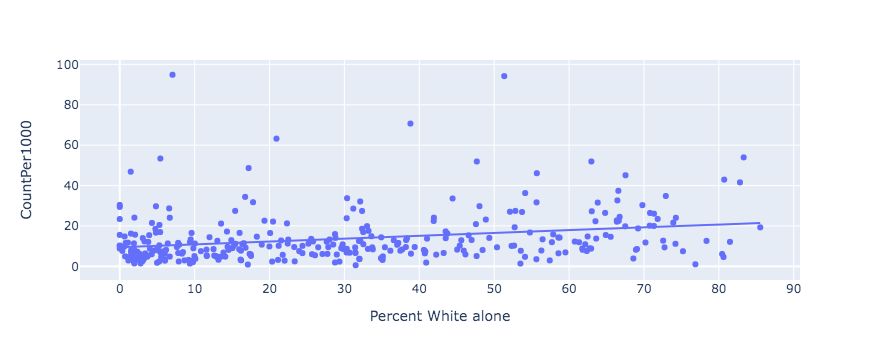

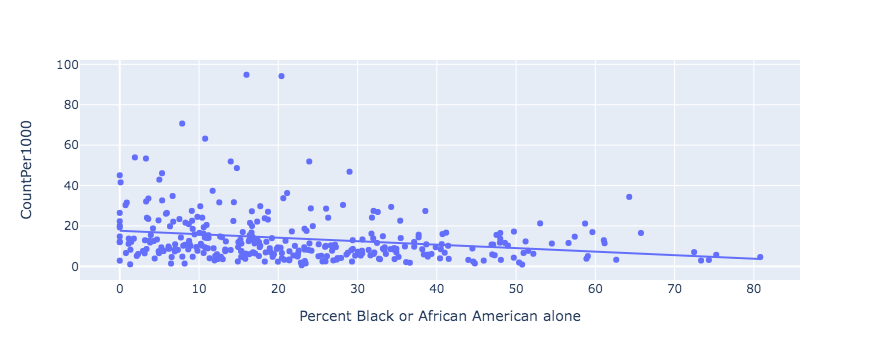

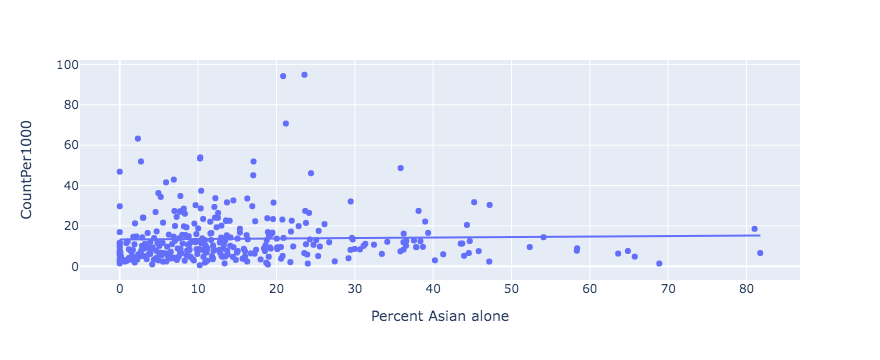

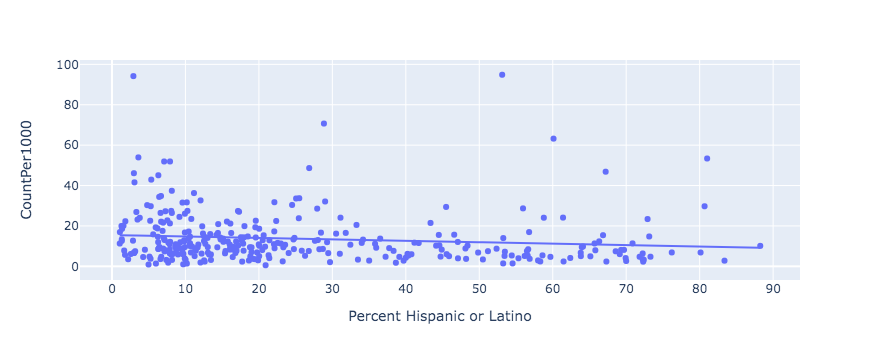

In [24]:
race_list = ['Percent White alone', 'Percent Black or African American alone','Percent Asian alone','Percent Hispanic or Latino']

# Function
def racecharts(race):
    fig = px.scatter(countsort2019gdf, x=race, y='CountPer1000', trendline='ols')
    fig.show()
    

# call the function with a loop
for race in race_list:
    racecharts(race)
    

In [12]:
countpersort2019gdf = mapcountrace2019gdf.sort_values(by='CountPer1000',ascending = False)
countpersort2019gdf.head(10)

Total  Percent White alone  Percent Black or African American alone  \
165   369.0             7.046070                                15.989160   
29    446.0            51.345291                                20.403587   
161   863.0            38.818076                                 7.879490   
218  1123.0            20.926091                                10.774711   
108  1780.0            83.314607                                 1.910112   
164  1180.0             5.423729                                 3.305085   
306   443.0            62.979684                                13.995485   
84    732.0            47.677596                                23.907104   
188  1110.0            17.207207                                14.774775   
259   683.0             1.464129                                28.989751   

     Percent American Indian and Alaska Native alone  Percent Asian alone  \
165                                         0.000000            23.577236   
29                                          0.000000            20.852018   
161                                         0.000000            21.205098   
218                                         0.267142             2.315227   
108                                         0.000000            10.280899   
164                                         0.000000            10.254237   
306                                         0.000000             2.708804   
84                                          0.000000            17.076503   
188                                         0.450450            35.855856   
259                                         0.000000             0.000000   

     Percent Native Hawaiian and Other Pacific Islander alone  \
165                                           0.000000          
29                                            2.690583          
161                                           0.347625          
218                                           1.068566          
108                                           0.000000          
164                                           0.000000          
306                                           0.000000          
84                                            0.546448          
188                                           0.450450          
259                                           2.342606          

     Percent Some other race alone  Percent Two or more races  \
165                            0.0                   0.271003   
29                             0.0                   1.793722   
161                            0.0                   2.896871   
218                            0.0                   4.541407   
108                            0.0                   0.898876   
164                            0.0                   0.000000   
306                            0.0                  12.415350   
84                             0.0                   3.688525   
188                            0.0                   4.414414   
259                            0.0                   0.000000   

     Percent Hispanic or Latino     newgeoid  counts  \
165                   53.116531  60014061002      35   
29                     2.914798  60014011001      42   
161                   28.852839  60014060001      61   
218                   60.106857  60014073002      71   
108                    3.595506  60014045024      96   
164                   81.016949  60014061001      63   
306                    7.900677  60014099001      23   
84                     7.103825  60014038003      38   
188                   26.846847  60014066021      54   
259                   67.203514  60014085003      32   

                                              geometry  CountPer1000  
165  MULTIPOLYGON (((-13606604.180 4546841.221, -13...     94.850949  
29   MULTIPOLYGON (((-13610350.749 4555678.437, -13...     94.170404  
161  MULTIPOLYGON (((-13610739.699 4549621.598, 

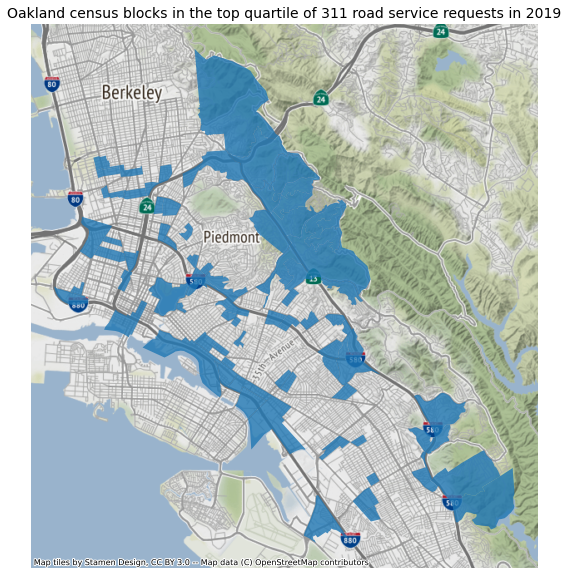

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))

countsort2019gdf[countsort2019gdf['CountPer1000'] > 16].plot(ax=ax, alpha=0.8)


ax.axis('off')


ax.set_title('Oakland census blocks in the top quartile of 311 road service requests in 2019',fontsize=14)

# add a basemap
ctx.add_basemap(ax)

In [25]:
countsort2019gdf.loc[countsort2019gdf['Percent White alone'] > 50, 'Majority Race'] = 'White'
countsort2019gdf.loc[countsort2019gdf['Percent Black or African American alone'] > 50, 'Majority Race'] = 'Black'
countsort2019gdf.loc[countsort2019gdf['Percent Asian alone'] > 50, 'Majority Race'] = 'Asian'
countsort2019gdf.loc[countsort2019gdf['Percent Hispanic or Latino'] > 50, 'Majority Race'] = 'Latino'
countsort2019gdf.fillna('Mixed', inplace=True)
countsort2019gdf.sample(10)

Total  Percent White alone  Percent Black or African American alone  \
203  1278.0            28.012520                                 4.694836   
251   808.0            30.321782                                34.900990   
168  1149.0             3.394256                                25.413403   
31    958.0            31.941545                                 4.279749   
74    743.0            48.452221                                13.997308   
159  1527.0            11.984283                                12.901113   
79   1569.0            45.060548                                23.326960   
225  1406.0            21.763869                                75.248933   
124   818.0            80.440098                                 2.322738   
177   803.0             1.494396                                31.755915   

     Percent American Indian and Alaska Native alone  Percent Asian alone  \
203                                         1.956182            29.733959   
251                                         0.742574            15.841584   
168                                         0.000000            43.951262   
31                                          0.000000            44.676409   
74                                          0.000000            12.113055   
159                                         0.916830            54.092993   
79                                          0.000000             8.922881   
225                                         0.000000             0.000000   
124                                         0.000000             9.902200   
177                                         0.000000            36.239103   

     Percent Native Hawaiian and Other Pacific Islander alone  \
203                                                0.0          
251                                                0.0          
168                                                0.0          
31                                                 0.0          
74                                                 0.0          
159                                                0.0          
79                                                 0.0          
225                                                0.0          
124                                                0.0          
177                                                0.0          

     Percent Some other race alone  Percent Two or more races  \
203                       0.000000                  20.813772   
251                       0.000000                  11.881188   
168                       0.000000                   0.957354   
31                        1.983299                   4.592902   
74                        1.345895                   3.633917   
159                       0.392927                   2.161100   
79                        1.848311                   4.780115   
225                       0.000000                   1.209104   
124                       0.000000                   4.767726   
177                       0.000000                   0.000000   

     Percent Hispanic or Latino     newgeoid  counts  \
203                   14.788732  60014070002      17   
251                    6.311881  60014083003       7   
168                   26.283725  60014062011       6   
31                    12.526096  60014011003      12   
74                    20.457604  60014035021       6   
159                   17.550753  60014059021      22   
79                    16.061185  60014037012      13   
225                    1.778094  60014076001       8   
124                    2.567237  60014051001       5   
177                   30.510585  60014063004      13   

                                              geometry  CountPer1000  \
203  MULTIPOLYGON (((-13603651.653 4549430.310, -13...     13.302034   
251  MULTIPOLYGON (((-13599875.140 4547583.389, -13...      8.663366   
168  MULTIPOLYGON (((-13606801.327 4549512.29

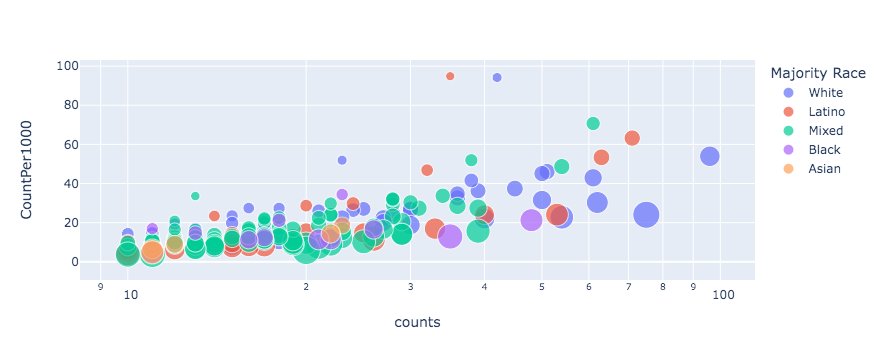

In [31]:
fig = px.scatter(countsort2019gdf.query("counts>=10"), x="counts", y="CountPer1000", size="Total", color="Majority Race",
                 log_x=True, size_max=20)
fig.show()

In [36]:
closerace2019gdf = gpd.read_file('blockcloserace2019gdf.geojson')
pd.set_option('display.max_columns', None)
closerace2019gdf.sample(3)

geoid                        name   Total  White alone  \
89   15000US060014041021  Block Group 1, Alameda, CA  1598.0       1106.0   
233  15000US060014079003  Block Group 3, Alameda, CA  1209.0        591.0   
302  15000US060014099003  Block Group 3, Alameda, CA  1418.0        318.0   

     Black or African American alone  American Indian and Alaska Native alone  \
89                              67.0                                     34.0   
233                            226.0                                      0.0   
302                            773.0                                      0.0   

     Asian alone  Native Hawaiian and Other Pacific Islander alone  \
89         160.0                                              20.0   
233        251.0                                               2.0   
302        148.0                                               0.0   

     Some other race alone  Two or more races  Hispanic or Latino  \
89                    14.0               98.0                99.0   
233                   53.0               44.0                42.0   
302                   34.0              130.0                15.0   

     Percent White alone  Percent Black or African American alone  \
89             69.211514                                 4.192741   
233            48.883375                                18.693135   
302            22.425952                                54.513399   

     Percent American Indian and Alaska Native alone  Percent Asian alone  \
89                                           2.12766            10.012516   
233                                          0.00000            20.760959   
302                                          0.00000            10.437236   

     Percent Native Hawaiian and Other Pacific Islander alone  \
89                                            1.251564          
233                                           0.165426          
302                                           0.000000          

     Percent Some other race alone  Percent Two or more races  \
89                        0.876095                   6.132666   
233                       4.383788                   3.639371   
302                       2.397743                   9.167842   

     Percent Hispanic or Latino       geoid10     newgeoid  closure_median  \
89                     6.195244  060014041021  60014041021            40.0   
233                    3.473945  060014079003  60014079003            28.0   
302                    1.057828  060014099003  60014099003            78.0   

                                              geometry  
89   MULTIPOLYGON (((-122.25300 37.82544, -122.2525...  
233  MULTIPOLYGON (((-122.19572 37.78686, -122.1955...  
302  MULTIPOLYGON (((-122.14252 37.75891, -122.1424...

In [39]:
columns_to_keep = ['Total',
 'Percent White alone',
 'Percent Black or African American alone',
 'Percent American Indian and Alaska Native alone',
 'Percent Asian alone',
 'Percent Native Hawaiian and Other Pacific Islander alone',
 'Percent Some other race alone',
 'Percent Two or more races',
 'Percent Hispanic or Latino',
 'newgeoid',
 'closure_median',
 'geometry']

In [42]:
newcloserace2019gdf = closerace2019gdf[columns_to_keep]
newcloserace2019gdf

Total  Percent White alone  Percent Black or African American alone  \
0    3120.0            74.262821                                 3.429487   
1    1017.0            70.206490                                 3.834808   
2    1134.0            64.814815                                 0.000000   
3    1237.0            81.487470                                 1.455133   
4    1136.0            55.633803                                32.834507   
..      ...                  ...                                      ...   
314  1290.0             1.705426                                31.627907   
315  1400.0             2.428571                                49.714286   
316  1787.0            12.870733                                22.439843   
317  2705.0            14.898336                                61.072089   
318   583.0            52.830189                                 9.090909   

     Percent American Indian and Alaska Native alone  Percent Asian alone  \
0                                           0.000000            12.532051   
1                                           0.000000            12.782694   
2                                           0.000000            24.162257   
3                                           0.000000             9.135004   
4                                           0.000000             9.330986   
..                                               ...                  ...   
314                                         0.697674             5.348837   
315                                         0.214286             6.928571   
316                                         0.000000            16.004477   
317                                         0.258780            10.868762   
318                                         1.543739            23.670669   

     Percent Native Hawaiian and Other Pacific Islander alone  \
0                                             0.000000          
1                                             0.000000          
2                                             0.000000          
3                                             0.000000          
4                                             0.000000          
..                                                 ...          
314                                           0.000000          
315                                           0.000000          
316                                           0.000000          
317                                           0.887246          
318                                           0.514580          

     Percent Some other race alone  Percent Two or more races  \
0                         0.000000                   5.993590   
1                         0.000000                   5.506391   
2                         0.000000                   4.409171   
3                         0.000000                   0.000000   
4                         0.000000                   0.000000   
..                             ...                        ...   
314                       0.000000                   2.015504   
315                       0.000000                   0.714286   
316                       0.000000                   2.797985   
317                       0.258780                   1.922366   
318                       0.857633                   3.430532   

     Percent Hispanic or Latino     newgeoid  closure_median  \
0                      3.782051  60014001001            25.5   
1                      7.669617  60014002002            15.0   
2                      6.613757  60014003001            42.0   
3                      7.922393  60014003002            92.0   
4                      2.200704  60014003003           294.5   
..                          ...          ...             ...   
314                   58.604651  60014104001            15.5   
315                   40.000000  60014104002            10.0   
316               

In [45]:
mapcloserace2019gdf = newcloserace2019gdf.to_crs(epsg=3857)

In [47]:
closesort2019gdf = mapcloserace2019gdf.sort_values(by='closure_median',ascending = False)
closesort2019gdf.head(10)

Total  Percent White alone  Percent Black or African American alone  \
222  1301.0            11.606457                                21.906226   
193   622.0            85.530547                                 0.000000   
20   1075.0            54.139535                                21.116279   
127  1189.0            52.733389                                10.597140   
192   924.0            30.303030                                18.290043   
261  1904.0             0.787815                                56.617647   
232   925.0            52.108108                                18.702703   
41   1260.0            31.190476                                26.031746   
265  1280.0             1.093750                                47.968750   
185   541.0            62.476895                                 0.000000   

     Percent American Indian and Alaska Native alone  Percent Asian alone  \
222                                         0.000000             8.531899   
193                                         0.000000             8.520900   
20                                          0.000000             4.930233   
127                                         0.000000            12.363331   
192                                         1.298701            18.831169   
261                                         0.000000             0.840336   
232                                         0.000000             7.675676   
41                                          0.000000             8.174603   
265                                         0.000000             0.000000   
185                                         0.000000            19.038817   

     Percent Native Hawaiian and Other Pacific Islander alone  \
222                                           0.000000          
193                                           0.000000          
20                                            0.000000          
127                                           2.102607          
192                                           0.000000          
261                                           0.000000          
232                                           0.000000          
41                                            1.349206          
265                                           0.000000          
185                                           0.000000          

     Percent Some other race alone  Percent Two or more races  \
222                            0.0                   3.535742   
193                            0.0                   0.000000   
20                             0.0                   8.651163   
127                            0.0                   2.691337   
192                            0.0                   5.844156   
261                            0.0                   0.000000   
232                            0.0                   4.216216   
41                             0.0                   5.317460   
265                            0.0                   9.765625   
185                            0.0                   0.000000   

     Percent Hispanic or Latino     newgeoid  closure_median  \
222                   54.419677  60014076004           782.0   
193                    5.948553  60014069001           730.0   
20                    11.162791  60014009002           662.0   
127                   19.512195  60014052004           590.0   
192                   25.432900  60014068004           500.0   
261                   41.754202  60014087002           498.0   
232                   17.297297  60014079002           482.0   
41                    27.936508  60014016001           479.0   
265                   41.171875  60014087006           468.0   
185                   18.484288  60014067002           440.0   

                                              geometry  
222  MULTIPOLYGON (((-13604195.004 4547470.300, -13...  
193  MULTIPOLYGON (((-13602460.535 4550946.485, -13...  
20

In [48]:
closesort2019gdf.describe()

Total  Percent White alone  \
count   319.000000           319.000000   
mean   1295.062696            29.530755   
std     495.590312            23.789453   
min     369.000000             0.000000   
25%     947.500000             7.711548   
50%    1202.000000            25.815809   
75%    1552.000000            47.607509   
max    3423.000000            85.530547   

       Percent Black or African American alone  \
count                               319.000000   
mean                                 23.018215   
std                                  16.759805   
min                                   0.000000   
25%                                   9.931172   
50%                                  19.456193   
75%                                  33.016170   
max                                  80.804598   

       Percent American Indian and Alaska Native alone  Percent Asian alone  \
count                                       319.000000           319.000000   
mean                                          0.346248            15.374344   
std                                           0.877512            14.378200   
min                                           0.000000             0.000000   
25%                                           0.000000             5.497942   
50%                                           0.000000            11.661662   
75%                                           0.281038            20.062268   
max                                           6.985646            81.752701   

       Percent Native Hawaiian and Other Pacific Islander alone  \
count                                         319.000000          
mean                                            0.505498          
std                                             1.394526          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             0.131233          
max                                            10.710059          

       Percent Some other race alone  Percent Two or more races  \
count                     319.000000                 319.000000   
mean                        0.412155                   4.754993   
std                         1.126764                   3.994132   
min                         0.000000                   0.000000   
25%                         0.000000                   1.822073   
50%                         0.000000                   4.158965   
75%                         0.000000                   6.859903   
max                        12.710280                  23.809524   

       Percent Hispanic or Latino  closure_median  
count                  319.000000      319.000000  
mean                    26.057792       73.603448  
std                     21.681441      121.343768  
min                      1.057828        1.000000  
25%                      9.247114       15.250000  
50%                     17.857143       31.000000  
75%                     40.114437       67.000000  
max                     88.247214      782.000000

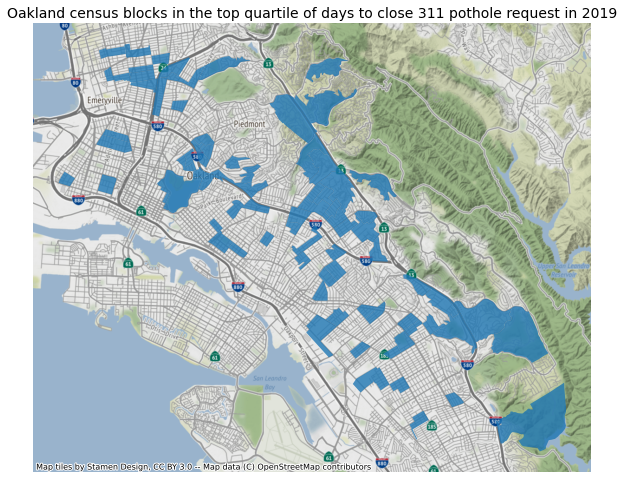

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))

closesort2019gdf[closesort2019gdf['closure_median'] > 67].plot(ax=ax, alpha=0.8)


ax.axis('off')


ax.set_title('Oakland census blocks in the top quartile of days to close 311 pothole request in 2019',fontsize=14)

# add a basemap
ctx.add_basemap(ax)

In [50]:
closesort2019gdf.loc[closesort2019gdf['Percent White alone'] > 50, 'Majority Race'] = 'White'
closesort2019gdf.loc[closesort2019gdf['Percent Black or African American alone'] > 50, 'Majority Race'] = 'Black'
closesort2019gdf.loc[closesort2019gdf['Percent Asian alone'] > 50, 'Majority Race'] = 'Asian'
closesort2019gdf.loc[closesort2019gdf['Percent Hispanic or Latino'] > 50, 'Majority Race'] = 'Latino'
closesort2019gdf.fillna('Mixed', inplace=True)
closesort2019gdf.sample(10)

Total  Percent White alone  Percent Black or African American alone  \
105   757.0            67.503303                                 6.340819   
242   918.0            13.180828                                62.636166   
39   1041.0            43.515850                                21.709894   
191  1031.0            37.051406                                 8.244423   
82   1769.0            47.654042                                12.040701   
135  1975.0             5.721519                                20.455696   
267  2438.0            15.053322                                34.618540   
43    935.0            41.925134                                14.331551   
245   808.0            30.321782                                34.900990   
57   2914.0            31.983528                                32.704187   

     Percent American Indian and Alaska Native alone  Percent Asian alone  \
105                                         0.000000             8.190225   
242                                         0.000000             4.357298   
39                                          0.000000             4.707012   
191                                         0.387973            24.733269   
82                                          0.508762            25.325042   
135                                         0.405063            44.556962   
267                                         0.000000             4.019688   
43                                          0.000000            13.582888   
245                                         0.742574            15.841584   
57                                          0.343171            20.590254   

     Percent Native Hawaiian and Other Pacific Islander alone  \
105                                           0.000000          
242                                           0.000000          
39                                            0.000000          
191                                           0.000000          
82                                            0.000000          
135                                           2.784810          
267                                           7.383101          
43                                            0.000000          
245                                           0.000000          
57                                            0.000000          

     Percent Some other race alone  Percent Two or more races  \
105                       1.981506                   3.698811   
242                       0.000000                   9.803922   
39                        0.000000                   7.973103   
191                       0.872939                   5.140640   
82                        0.000000                   3.222159   
135                       0.000000                   2.025316   
267                       0.000000                   1.189500   
43                        0.000000                   7.807487   
245                       0.000000                  11.881188   
57                        0.000000                   9.128346   

     Percent Hispanic or Latino     newgeoid  closure_median  \
105                   12.285337  60014046002            23.0   
242                   10.021786  60014082003            55.0   
39                    22.094140  60014015002            51.0   
191                   23.569350  60014068003            74.0   
82                    11.249293  60014039001           381.0   
135                   24.050633  60014054021            55.0   
267                   37.735849  60014088002            29.0   
43                    22.352941  60014017001            38.0   
245                    6.311881  60014083003            15.0   
57                     5.250515  60014028002            32.0   

                                              geometry Majority Race  
105  MULTIPOLYGON (((-13602876.647 4555284.930, -13...         White  
242  MULTIPOLYGON (((-13601451.

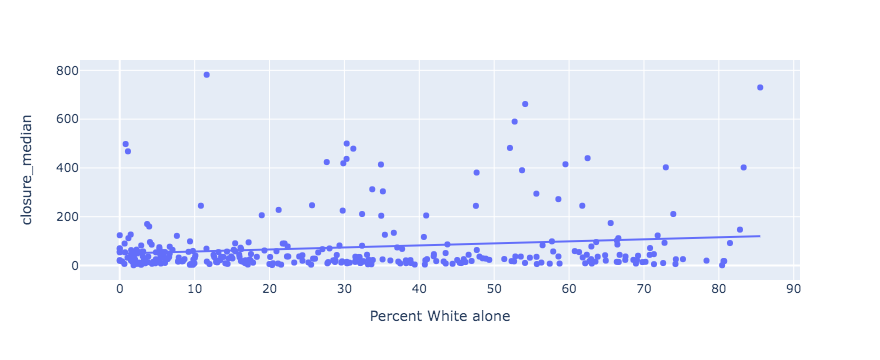

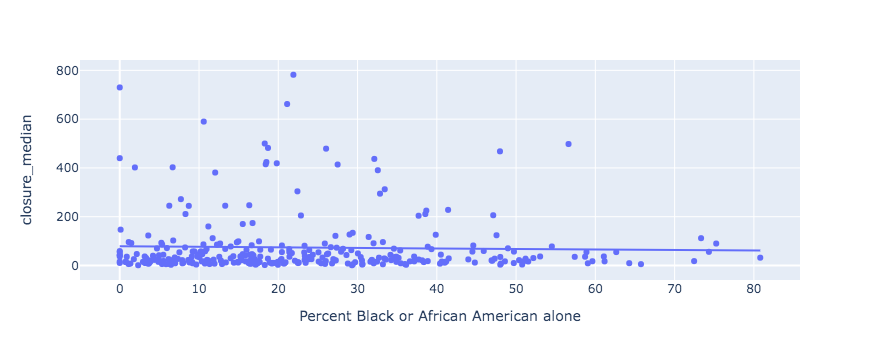

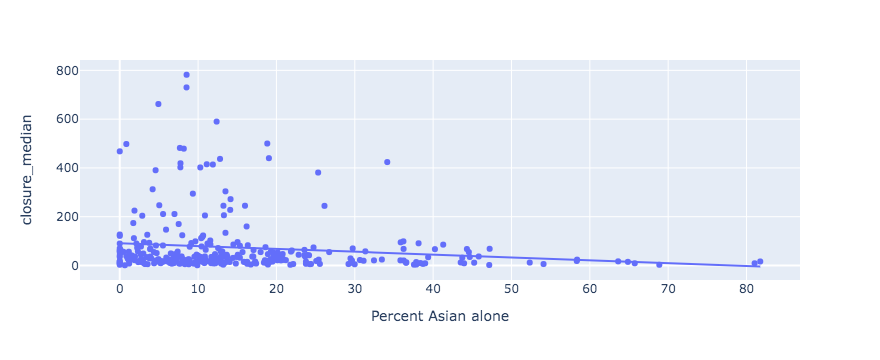

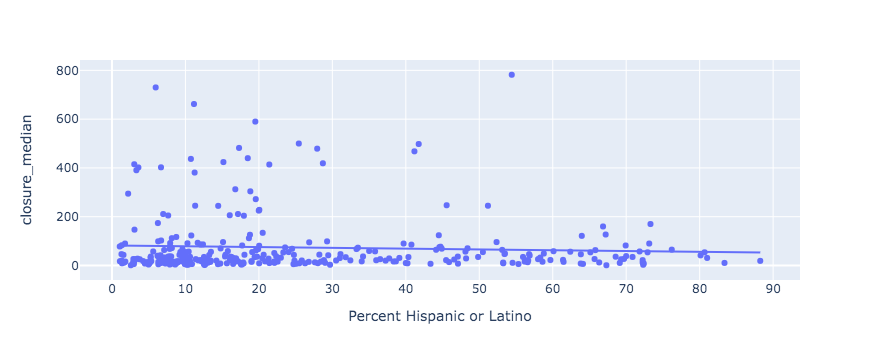

In [51]:
race_list = ['Percent White alone', 'Percent Black or African American alone','Percent Asian alone','Percent Hispanic or Latino']

# Function
def racecharts(race):
    fig = px.scatter(closesort2019gdf, x=race, y='closure_median', trendline='ols')
    fig.show()
    

# call the function with a loop
for race in race_list:
    racecharts(race)
    

In [53]:
countdf_grouped = countrace2019gdf.groupby(['newgeoid']).median()[['counts']]
countdf_grouped.sample(3)

counts
newgeoid           
60014095001    13.0
60014065001    25.0
60014061002    35.0

In [55]:
countdf = countdf_grouped.rename_axis('newgeoid').reset_index('newgeoid')
print (countdf)

        newgeoid  counts
0    60014001001    75.0
1    60014002001     1.0
2    60014002002    12.0
3    60014003001    30.0
4    60014003002    15.0
..           ...     ...
320  60014104001     7.0
321  60014104002     6.0
322  60014104003     9.0
323  60014105001    35.0
324  60019832001    16.0

[325 rows x 2 columns]


In [58]:
countdf.columns = ['newgeoid', 'count']
countdf

newgeoid  count
0    60014001001   75.0
1    60014002001    1.0
2    60014002002   12.0
3    60014003001   30.0
4    60014003002   15.0
..           ...    ...
320  60014104001    7.0
321  60014104002    6.0
322  60014104003    9.0
323  60014105001   35.0
324  60019832001   16.0

[325 rows x 2 columns]

In [59]:
closecountrace19gdf = closesort2019gdf.merge(countdf,on='newgeoid')
closecountrace19gdf

Total  Percent White alone  Percent Black or African American alone  \
0    1301.0            11.606457                                21.906226   
1     622.0            85.530547                                 0.000000   
2    1075.0            54.139535                                21.116279   
3    1189.0            52.733389                                10.597140   
4     924.0            30.303030                                18.290043   
..      ...                  ...                                      ...   
314   726.0             9.366391                                 6.473829   
315  1442.0             9.778086                                36.130374   
316  1268.0            20.347003                                18.296530   
317   818.0            80.440098                                 2.322738   
318  1679.0             1.846337                                29.303157   

     Percent American Indian and Alaska Native alone  Percent Asian alone  \
0                                           0.000000             8.531899   
1                                           0.000000             8.520900   
2                                           0.000000             4.930233   
3                                           0.000000            12.363331   
4                                           1.298701            18.831169   
..                                               ...                  ...   
314                                         5.096419            68.870523   
315                                         0.693481            21.775312   
316                                         1.577287            47.160883   
317                                         0.000000             9.902200   
318                                         0.893389             0.655152   

     Percent Native Hawaiian and Other Pacific Islander alone  \
0                                             0.000000          
1                                             0.000000          
2                                             0.000000          
3                                             2.102607          
4                                             0.000000          
..                                                 ...          
314                                           0.000000          
315                                           0.000000          
316                                           0.000000          
317                                           0.000000          
318                                           0.000000          

     Percent Some other race alone  Percent Two or more races  \
0                              0.0                   3.535742   
1                              0.0                   0.000000   
2                              0.0                   8.651163   
3                              0.0                   2.691337   
4                              0.0                   5.844156   
..                             ...                        ...   
314                            0.0                   0.000000   
315                            0.0                   1.941748   
316                            0.0                   0.000000   
317                            0.0                   4.767726   
318                            0.0                   0.000000   

     Percent Hispanic or Latino     newgeoid  closure_median  \
0                     54.419677  60014076004           782.0   
1                      5.948553  60014069001           730.0   
2                     11.162791  60014009002           662.0   
3                     19.512195  60014052004           590.0   
4                     25.432900  60014068004           500.0   
..                          ...          ...             ...   
314                   10.192837  60014058004             3.0   
315                   29.680999  60014063002             3.0   
316               

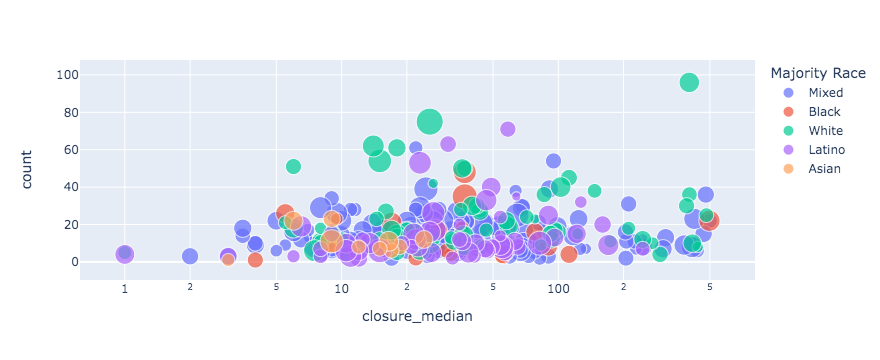

In [70]:
fig = px.scatter(closecountrace19gdf.query("closure_median<=500"), x="closure_median", y="count", size="Total", color="Majority Race",
                 log_x=True, size_max=20)
fig.show()

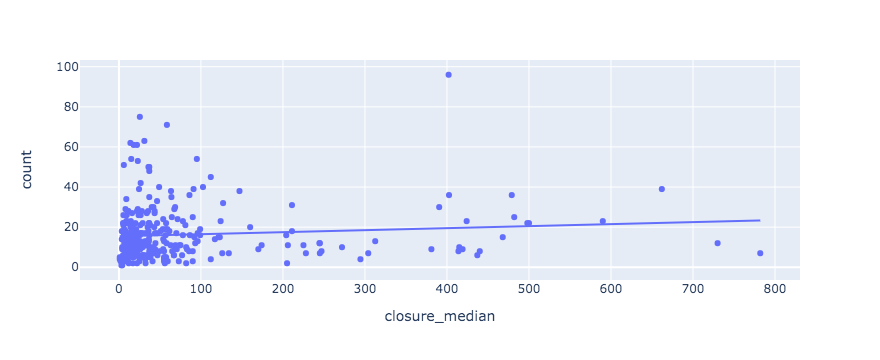

In [68]:
fig = px.scatter(closecountrace19gdf, x='closure_median', y='count', trendline='ols')
fig.show()

In [73]:
Top25closuredf = closecountrace19gdf.loc[closecountrace19gdf['closure_median'] >= 67]
Top25closuredf

Total  Percent White alone  Percent Black or African American alone  \
0   1301.0            11.606457                                21.906226   
1    622.0            85.530547                                 0.000000   
2   1075.0            54.139535                                21.116279   
3   1189.0            52.733389                                10.597140   
4    924.0            30.303030                                18.290043   
..     ...                  ...                                      ...   
76   987.0             0.000000                                28.166160   
77  1082.0            37.707948                                13.308688   
78  1415.0             5.300353                                10.954064   
79  2011.0            16.210840                                21.382397   
80   979.0            27.068437                                39.325843   

    Percent American Indian and Alaska Native alone  Percent Asian alone  \
0                                          0.000000             8.531899   
1                                          0.000000             8.520900   
2                                          0.000000             4.930233   
3                                          0.000000            12.363331   
4                                          1.298701            18.831169   
..                                              ...                  ...   
76                                         0.000000            47.213779   
77                                         0.000000            36.229205   
78                                         0.000000            44.310954   
79                                         0.000000            40.228742   
80                                         0.000000             3.881512   

    Percent Native Hawaiian and Other Pacific Islander alone  \
0                                            0.000000          
1                                            0.000000          
2                                            0.000000          
3                                            2.102607          
4                                            0.000000          
..                                                ...          
76                                           0.000000          
77                                           0.739372          
78                                           0.000000          
79                                           0.000000          
80                                           7.150153          

    Percent Some other race alone  Percent Two or more races  \
0                        0.000000                   3.535742   
1                        0.000000                   0.000000   
2                        0.000000                   8.651163   
3                        0.000000                   2.691337   
4                        0.000000                   5.844156   
..                            ...                        ...   
76                       0.000000                   0.101317   
77                       0.000000                   4.158965   
78                       1.272085                   4.876325   
79                       0.000000                   2.287419   
80                       0.000000                  12.972421   

    Percent Hispanic or Latino     newgeoid  closure_median  \
0                    54.419677  60014076004           782.0   
1                     5.948553  60014069001           730.0   
2                    11.162791  60014009002           662.0   
3                    19.512195  60014052004           590.0   
4                    25.432900  60014068004           500.0   
..                         ...          ...             ...   
76                   24.518744  60014059013            68.5   
77                    7.855823  60014034003            68.0   
78                   33.286219  60014059022            67.5   
79         

In [84]:
Top25closuredf.describe()

Total  Percent White alone  \
count    81.000000            81.000000   
mean   1192.876543            35.001987   
std     388.079998            25.110529   
min     443.000000             0.000000   
25%     925.000000            11.606457   
50%    1131.000000            32.358156   
75%    1406.000000            56.463596   
max    2444.000000            85.530547   

       Percent Black or African American alone  \
count                                81.000000   
mean                                 22.888712   
std                                  16.279466   
min                                   0.000000   
25%                                  10.954064   
50%                                  19.808612   
75%                                  32.556054   
max                                  75.248933   

       Percent American Indian and Alaska Native alone  Percent Asian alone  \
count                                        81.000000            81.000000   
mean                                          0.282582            12.740359   
std                                           0.956471            11.380050   
min                                           0.000000             0.000000   
25%                                           0.000000             4.623568   
50%                                           0.000000            10.390690   
75%                                           0.000000            15.036378   
max                                           6.985646            47.213779   

       Percent Native Hawaiian and Other Pacific Islander alone  \
count                                          81.000000          
mean                                            0.654815          
std                                             1.885227          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             0.000000          
max                                            10.710059          

       Percent Some other race alone  Percent Two or more races  \
count                      81.000000                  81.000000   
mean                        0.412159                   4.742101   
std                         0.988852                   4.389810   
min                         0.000000                   0.000000   
25%                         0.000000                   1.222954   
50%                         0.000000                   4.249292   
75%                         0.000000                   6.889952   
max                         4.451039                  20.813772   

       Percent Hispanic or Latino  closure_median      count  
count                   81.000000       81.000000  81.000000  
mean                    23.277284      216.191358  17.518519  
std                     18.943849      173.627665  14.262811  
min                      1.057828       67.000000   2.000000  
25%                      8.748552       86.000000   8.000000  
50%                     17.953321      126.000000  13.000000  
75%                     33.286219      304.000000  23.000000  
max                     73.305085      782.000000  96.000000

In [98]:
WhiteBlocksdf = closecountrace19gdf.loc[closecountrace19gdf['Percent White alone']>33]
WhiteBlocksdf.describe()

Total  Percent White alone  \
count   124.000000           124.000000   
mean   1199.338710            55.293897   
std     460.372788            14.093337   
min     387.000000            33.021077   
25%     878.750000            43.005666   
50%    1139.500000            55.644956   
75%    1429.750000            66.487227   
max    3120.000000            85.530547   

       Percent Black or African American alone  \
count                               124.000000   
mean                                 13.392407   
std                                  10.874294   
min                                   0.000000   
25%                                   4.974482   
50%                                  10.371915   
75%                                  20.581760   
max                                  43.974630   

       Percent American Indian and Alaska Native alone  Percent Asian alone  \
count                                       124.000000           124.000000   
mean                                          0.222408            13.323812   
std                                           0.542928             7.630189   
min                                           0.000000             1.728723   
25%                                           0.000000             8.282047   
50%                                           0.000000            11.896106   
75%                                           0.000000            17.050911   
max                                           2.670112            37.858509   

       Percent Native Hawaiian and Other Pacific Islander alone  \
count                                         124.000000          
mean                                            0.380185          
std                                             1.006382          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             0.000000          
max                                             7.904549          

       Percent Some other race alone  Percent Two or more races  \
count                     124.000000                 124.000000   
mean                        0.433180                   5.867817   
std                         1.001240                   4.082772   
min                         0.000000                   0.000000   
25%                         0.000000                   3.080598   
50%                         0.000000                   5.109346   
75%                         0.055391                   8.356604   
max                         6.282383                  23.809524   

       Percent Hispanic or Latino  closure_median       count  
count                  124.000000      124.000000  124.000000  
mean                    11.086295       93.233871   19.620968  
std                      7.025552      142.927926   15.430723  
min                      1.292597        1.000000    2.000000  
25%                      6.538510       16.375000    9.750000  
50%                      8.969918       32.500000   15.000000  
75%                     15.844643       92.250000   23.250000  
max                     36.510501      730.000000   96.000000

**For Census Blocks At Least 1/3 White:**

Median Closure Time: 32 days

Median Count: 15 

In [99]:
BlackBlocksdf = closecountrace19gdf.loc[closecountrace19gdf['Percent Black or African American alone']>33]
BlackBlocksdf.describe()

Total  Percent White alone  \
count    80.000000            80.000000   
mean   1269.262500            16.482246   
std     477.723763            12.080710   
min     603.000000             0.000000   
25%     946.000000             4.947181   
50%    1109.500000            16.163066   
75%    1450.500000            27.427960   
max    2705.000000            46.163934   

       Percent Black or African American alone  \
count                                80.000000   
mean                                 46.448979   
std                                  11.418833   
min                                  33.197832   
25%                                  37.563738   
50%                                  44.545937   
75%                                  51.280694   
max                                  80.804598   

       Percent American Indian and Alaska Native alone  Percent Asian alone  \
count                                        80.000000            80.000000   
mean                                          0.246534             7.849029   
std                                           0.689524             7.212541   
min                                           0.000000             0.000000   
25%                                           0.000000             2.739985   
50%                                           0.000000             5.374061   
75%                                           0.000000            11.074542   
max                                           4.369628            33.456335   

       Percent Native Hawaiian and Other Pacific Islander alone  \
count                                          80.000000          
mean                                            0.731715          
std                                             1.748037          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             0.441921          
max                                             7.383101          

       Percent Some other race alone  Percent Two or more races  \
count                      80.000000                  80.000000   
mean                        0.377600                   4.655604   
std                         0.914896                   3.393987   
min                         0.000000                   0.000000   
25%                         0.000000                   1.936902   
50%                         0.000000                   4.535871   
75%                         0.000000                   6.816245   
max                         4.451039                  13.026141   

       Percent Hispanic or Latino  closure_median      count  
count                   80.000000       80.000000  80.000000  
mean                    23.208293       60.881250  12.112500  
std                     15.230237       90.454837   8.830319  
min                      1.057828        3.000000   1.000000  
25%                     10.819574       16.875000   6.000000  
50%                     18.712701       29.000000  10.500000  
75%                     37.884510       60.000000  16.000000  
max                     56.659619      498.000000  48.000000

**For Census Blocks At Least 1/3 Black:**

Median Closure Time: 29 days

Median Count: 11 

In [100]:
AsianBlocksdf = closecountrace19gdf.loc[closecountrace19gdf['Percent Asian alone']>33]
AsianBlocksdf.describe()

Total  Percent White alone  \
count    39.000000            39.000000   
mean   1323.487179            17.217437   
std     406.807977            11.551355   
min     726.000000             0.000000   
25%    1007.500000             8.836718   
50%    1268.000000            16.002452   
75%    1557.500000            23.630660   
max    2291.000000            45.400341   

       Percent Black or African American alone  \
count                                39.000000   
mean                                 15.251574   
std                                   7.988479   
min                                   0.780312   
25%                                   9.428400   
50%                                  14.934289   
75%                                  18.397736   
max                                  33.579336   

       Percent American Indian and Alaska Native alone  Percent Asian alone  \
count                                        39.000000            39.000000   
mean                                          0.650813            46.373601   
std                                           1.176912            12.576820   
min                                           0.000000            33.456335   
25%                                           0.000000            37.696234   
50%                                           0.000000            43.518519   
75%                                           0.785960            49.771764   
max                                           5.096419            81.752701   

       Percent Native Hawaiian and Other Pacific Islander alone  \
count                                          39.000000          
mean                                            0.422692          
std                                             0.899737          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             0.225225          
max                                             3.121248          

       Percent Some other race alone  Percent Two or more races  \
count                      39.000000                  39.000000   
mean                        0.339861                   2.651061   
std                         0.702761                   2.197486   
min                         0.000000                   0.000000   
25%                         0.000000                   1.023089   
50%                         0.000000                   2.287419   
75%                         0.190386                   4.286690   
max                         2.674173                   9.273980   

       Percent Hispanic or Latino  closure_median      count  
count                   39.000000       39.000000  39.000000  
mean                    17.092960       40.012821  15.769231  
std                      9.362567       69.308947  10.459097  
min                      1.372074        2.000000   1.000000  
25%                      9.790521        9.500000   8.500000  
50%                     16.083395       17.000000  13.000000  
75%                     24.284688       46.000000  21.000000  
max                     40.762902      424.000000  54.000000

**For Census Blocks At Least 1/3 Asian:**

Median Closure Time: 17 days

Median Count: 13

In [102]:
LatinoBlocksdf = closecountrace19gdf.loc[closecountrace19gdf['Percent Hispanic or Latino']>33]
LatinoBlocksdf.describe()

Total  Percent White alone  \
count    95.000000            95.000000   
mean   1437.968421             6.675781   
std     510.617700             7.030997   
min     369.000000             0.000000   
25%    1064.500000             2.024096   
50%    1330.000000             4.298357   
75%    1849.500000             8.262923   
max    2701.000000            41.033926   

       Percent Black or African American alone  \
count                                95.000000   
mean                                 24.255732   
std                                  12.632968   
min                                   0.000000   
25%                                  15.331343   
50%                                  23.349181   
75%                                  31.929183   
max                                  56.617647   

       Percent American Indian and Alaska Native alone  Percent Asian alone  \
count                                        95.000000            95.000000   
mean                                          0.250370             8.958774   
std                                           0.672167             9.111720   
min                                           0.000000             0.000000   
25%                                           0.000000             1.591080   
50%                                           0.000000             6.404834   
75%                                           0.000000            13.339264   
max                                           3.883030            44.310954   

       Percent Native Hawaiian and Other Pacific Islander alone  \
count                                          95.000000          
mean                                            0.746140          
std                                             2.017813          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             0.265416          
max                                            10.710059          

       Percent Some other race alone  Percent Two or more races  \
count                      95.000000                  95.000000   
mean                        0.304846                   3.142050   
std                         0.755230                   3.697541   
min                         0.000000                   0.000000   
25%                         0.000000                   0.135501   
50%                         0.000000                   2.015504   
75%                         0.000000                   4.432257   
max                         3.567735                  18.020022   

       Percent Hispanic or Latino  closure_median      count  
count                   95.000000       95.000000  95.000000  
mean                    55.666307       63.315789  13.768421  
std                     13.541261      107.171369  12.335257  
min                     33.286219        1.000000   2.000000  
25%                     44.650420       17.000000   6.000000  
50%                     55.954089       35.000000  10.000000  
75%                     66.584973       63.500000  17.000000  
max                     88.247214      782.000000  71.000000

**For Census Blocks At Least 1/3 Latino:**

Median Closure Time: 35 days

Median Count: 10

In [104]:
closecountrace19gdf.describe()

Total  Percent White alone  \
count   319.000000           319.000000   
mean   1295.062696            29.530755   
std     495.590312            23.789453   
min     369.000000             0.000000   
25%     947.500000             7.711548   
50%    1202.000000            25.815809   
75%    1552.000000            47.607509   
max    3423.000000            85.530547   

       Percent Black or African American alone  \
count                               319.000000   
mean                                 23.018215   
std                                  16.759805   
min                                   0.000000   
25%                                   9.931172   
50%                                  19.456193   
75%                                  33.016170   
max                                  80.804598   

       Percent American Indian and Alaska Native alone  Percent Asian alone  \
count                                       319.000000           319.000000   
mean                                          0.346248            15.374344   
std                                           0.877512            14.378200   
min                                           0.000000             0.000000   
25%                                           0.000000             5.497942   
50%                                           0.000000            11.661662   
75%                                           0.281038            20.062268   
max                                           6.985646            81.752701   

       Percent Native Hawaiian and Other Pacific Islander alone  \
count                                         319.000000          
mean                                            0.505498          
std                                             1.394526          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             0.131233          
max                                            10.710059          

       Percent Some other race alone  Percent Two or more races  \
count                     319.000000                 319.000000   
mean                        0.412155                   4.754993   
std                         1.126764                   3.994132   
min                         0.000000                   0.000000   
25%                         0.000000                   1.822073   
50%                         0.000000                   4.158965   
75%                         0.000000                   6.859903   
max                        12.710280                  23.809524   

       Percent Hispanic or Latino  closure_median       count  
count                  319.000000      319.000000  319.000000  
mean                    26.057792       73.603448   16.219436  
std                     21.681441      121.343768   13.226693  
min                      1.057828        1.000000    1.000000  
25%                      9.247114       15.250000    8.000000  
50%                     17.857143       31.000000   12.000000  
75%                     40.114437       67.000000   20.500000  
max                     88.247214      782.000000   96.000000

**Oakland as a whole:**

Median Closure Time: 31 days

Median Count: 12